In [1]:
from functions_for_all_nutrients import *
from iron_hemoglobin_functions import *

In [2]:
username = !whoami
username

['alibow']

In [3]:
index_cols=['location_id','sex_id','age_group_id']

age_group_ids = [2,3,4,5]
sex_ids = [1,2]
coverage_levels = [0.2,0.5,0.8]
years = [2021,2022,2023,2024,2025]

In [4]:
coverage_data_dir = f'/ihme/homes/{username[0]}/notebooks/vivarium_research_lsff/data_prep/outputs/lsff_input_coverage_data.csv'

In [5]:
location_ids = (list(
                pd.read_csv(coverage_data_dir)
                .location_id
                .unique()))
location_ids

[179, 163, 214, 161, 165, 190, 189, 196]

In [6]:
nutrient = 'iron'
vehicle = 'wheat flour'
effective_fractions = [0, 
                       0, 
                       0.1666666667, 
                       0.9166666667]

In [7]:
baseline_coverage, counterfactual_coverage = generate_overall_coverage_rates(
                                                     coverage_data_dir,
                                                     nutrient, 
                                                     vehicle,
                                                     coverage_levels,
                                                     years,
                                                     location_ids,
                                                    ['under-5','total population',np.nan])

# HEMOGLOBIN

In [8]:
from scipy.stats import norm

# mean and 0.975-quantile of normal distribution for mean difference (MD)
mean = 3
q_975 = 6.1

# 0.975-quantile of standard normal distribution (=1.96, approximately)
q_975_stdnorm = norm().ppf(0.975)

std = (q_975 - mean) / q_975_stdnorm # std dev of normal distribution

# Frozen normal distribution for MD, representing uncertainty in our effect size
hb_md_distribution = norm(mean, std)

In [9]:
mean_difference_hemoglobin_fort = generate_normal_rr_deficiency_nofort_draws(mean, std, location_ids)
mean_difference_hemoglobin_fort.head()

draws,draw_0,draw_1,draw_10,draw_100,draw_101,draw_102,draw_103,draw_104,draw_105,draw_106,...,draw_990,draw_991,draw_992,draw_993,draw_994,draw_995,draw_996,draw_997,draw_998,draw_999
location_id,,,,,,,,,,,,,,,,,,,,,
179,5.67384,2.263045,2.010783,1.632669,3.592127,3.619293,0.71747,3.769218,2.099288,5.25659,...,2.68253,2.315703,4.976409,5.670455,1.949907,3.061148,3.881265,2.227427,2.005891,1.92852
163,5.67384,2.263045,2.010783,1.632669,3.592127,3.619293,0.71747,3.769218,2.099288,5.25659,...,2.68253,2.315703,4.976409,5.670455,1.949907,3.061148,3.881265,2.227427,2.005891,1.92852
214,5.67384,2.263045,2.010783,1.632669,3.592127,3.619293,0.71747,3.769218,2.099288,5.25659,...,2.68253,2.315703,4.976409,5.670455,1.949907,3.061148,3.881265,2.227427,2.005891,1.92852
161,5.67384,2.263045,2.010783,1.632669,3.592127,3.619293,0.71747,3.769218,2.099288,5.25659,...,2.68253,2.315703,4.976409,5.670455,1.949907,3.061148,3.881265,2.227427,2.005891,1.92852
165,5.67384,2.263045,2.010783,1.632669,3.592127,3.619293,0.71747,3.769218,2.099288,5.25659,...,2.68253,2.315703,4.976409,5.670455,1.949907,3.061148,3.881265,2.227427,2.005891,1.92852


In [10]:
effective_baseline_coverage = get_effective_iron_hemoglobin_coverage(baseline_coverage, 
                                                                     sex_ids, 
                                                                     age_group_ids, 
                                                                     effective_fractions, 
                                                                     years)
effective_counterfactual_coverage = get_effective_iron_hemoglobin_coverage(counterfactual_coverage, 
                                                                     sex_ids, 
                                                                     age_group_ids, 
                                                                     effective_fractions, 
                                                                     years)

delta_effective_coverage = effective_counterfactual_coverage - effective_baseline_coverage
delta_effective_coverage

draw_0    draw_1  \
location_id sex_id age_group_id year coverage_level                       
161         1      2            2021 0.2             0.000000  0.000000   
                                     0.5             0.000000  0.000000   
                                     0.8             0.000000  0.000000   
                                2022 0.2             0.000000  0.000000   
                                     0.5             0.000000  0.000000   
...                                                       ...       ...   
214         2      5            2024 0.5             0.120834  0.118833   
                                     0.8             0.285525  0.284751   
                                2025 0.2            -0.043856 -0.047085   
                                     0.5             0.120834  0.118833   
                                     0.8             0.285525  0.284751   

                                                       draw_2    draw_3  \
location_id sex_id age_group_id year coverage_level                       
161         1      2            2021 0.2             0.000000  0.000000   
                                     0.5             0.000000  0.000000   
                                     0.8             0.000000  0.000000   
                                2022 0.2             0.000000  0.000000   
                                     0.5             0.000000  0.000000   
...                                                       ...       ...   
214         2      5            2024 0.5             0.123214  0.115098   
                                     0.8             0.286446  0.283305   
                                2025 0.2            -0.040019 -0.053110   
                                     0.5             0.123214  0.115098   
                                     0.8             0.286446  0.283305   

                                                       draw_4    draw_5  \
location_id sex_id age_group_id year coverage_level                       
161         1      2            2021 0.2             0.000000  0.000000   
                                     0.5             0.000000  0.000000   
                                     0.8             0.000000  0.000000   
                                2022 0.2             0.000000  0.000000   
                                     0.5             0.000000  0.000000   
...                                                       ...       ...   
214         2      5            2024 0.5             0.116174  0.113554   
                                     0.8             0.283722  0.282708   
                                2025 0.2            -0.051373 -0.055601   
                                     0.5             0.116174  0.113554   
                                     0.8             0.283722  0.282708   

                                                       draw_6    draw_7  \
location_id sex_id age_group_id year coverage_level                       
161         1      2            2021 0.2             0.000000  0.000000   
                                     0.5             0.000000  0.000000   
                                     0.8             0.000000  0.000000   
                                2022 0.2             0.000000  0.000000   
                                     0.5             0.000000  0.000000   
...                                                       ...       ...   
214         2      5            2024 0.5             0.128953  0.122627   
                                     0.8             0.288667  0.286219   
                                2025 0.2            -0.030761 -0.040966   
                                     0.5             0.128953  0.122627   
                                     0.8             0.288667  0.286219   

                                                       draw_8    draw_9  ...  \
location_id sex_id age_group_id year coverage_level                    

In [11]:
mean_hgb = generate_hemoglobin_values(delta_effective_coverage, 
                                      mean_difference_hemoglobin_fort,
                                      location_ids, age_group_ids, sex_ids)
mean_hgb.to_csv('anemia_files_u5/mean_hgb.csv')
mean_hgb

/ihme/homes/alibow/notebooks/vivarium_research_lsff/multiplication_models/iron_hemoglobin_functions.py:112: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  ignore_index=True)


draw_0  \
location_id sex_id age_group_id year_id coverage_level               
161         1      2            NaN     baseline        153.764447   
                   3            NaN     baseline        127.069234   
                   4            NaN     baseline        108.394954   
                   5            NaN     baseline        109.559302   
            2      2            NaN     baseline        154.765756   
...                                                            ...   
214         2      5            2024.0  0.5             100.804573   
                                        0.8             101.739003   
                                2025.0  0.2              99.870144   
                                        0.5             100.804573   
                                        0.8             101.739003   

                                                            draw_1  \
location_id sex_id age_group_id year_id coverage_level               
161         1      2            NaN     baseline        162.061641   
                   3            NaN     baseline        132.886735   
                   4            NaN     baseline        106.569739   
                   5            NaN     baseline        112.199090   
            2      2            NaN     baseline        159.978712   
...                                                            ...   
214         2      5            2024.0  0.5             102.108227   
                                        0.8             102.483707   
                                2025.0  0.2             101.732747   
                                        0.5             102.108227   
                                        0.8             102.483707   

                                                           draw_10  \
location_id sex_id age_group_id year_id coverage_level               
161         1      2            NaN     baseline        159.982495   
                   3            NaN     baseline        130.225829   
                   4            NaN     baseline        105.636577   
                   5            NaN     baseline        108.604511   
            2      2            NaN     baseline        155.456991   
...                                                            ...   
214         2      5            2024.0  0.5              98.737885   
                                        0.8              99.075704   
                                2025.0  0.2              98.400067   
                                        0.5              98.737885   
                                        0.8              99.075704   

                                                          draw_100  \
location_id sex_id age_group_id year_id coverage_level               
161         1      2            NaN     baseline        159.828745   
                   3            NaN     baseline        130.212727   
                   4            NaN     baseline        107.492919   
                   5            NaN     baseline        111.102709   
            2      2            NaN     baseline        155.983936   
...                                                            ...   
214         2      5            2024.0  0.5             100.589484   
                                        0.8             100.860305   
                                2025.0  0.2             100.318663   
                                        0.5             100.589484   
                                        0.8             100.860305   

                                                          draw_101  \
location_id sex_id age_group_id year_id coverage_level               
161         1      2            NaN     baseline        159.172649   
                   3            NaN     baseline        125.190682   
                   4            NaN     baseline        107.877297   
                   5            NaN     baseline        109.399169

In [12]:
hgb_sd = get_draws('modelable_entity_id',
                10488,
                source='epi',
                location_id=location_ids,
                age_group_id=age_group_ids,
                sex_id=sex_ids,
                year_id=2019,
                gbd_round_id=6,
                decomp_step='step4',
                status='best')
(hgb_sd.set_index(['location_id','sex_id','age_group_id'])
 .filter([c for c in hgb_sd if 'draw' in c])
 .reset_index()).to_csv('anemia_files_u5/sd_hgb.csv')

In [10]:
# NOW RUN HEMOGLOBIN_TO_ANEMIA.R FILE BEFORE RUNNING NEXT CELL
assert "Did you run the R file?" == "Double check :)", "Make sure you run the R file!"

AssertionError: Make sure you run the R file!

In [13]:
anemia = load_anemia_prev_and_calculate_ylds('anemia_files_u5/anemia_prev.csv')
baseline_anemia = (duplicate_over_simulation_years(anemia.loc[anemia.coverage_level=='baseline'], years)
                   .drop(columns='coverage_level')
                   .set_index(['location_id','age_group_id','sex_id','year','draw']))
counterfactual_anemia = (anemia.loc[anemia.coverage_level != 'baseline']
                         .set_index(['location_id','age_group_id','sex_id','year','draw','coverage_level']))
averted_anemia = baseline_anemia - counterfactual_anemia
averted_anemia

mild  \
location_id age_group_id sex_id year draw     coverage_level             
161         2            1      2021 draw_0   0.2             0.000000   
                                              0.5             0.000000   
                                              0.8             0.000000   
                                     draw_1   0.2             0.000000   
                                              0.5             0.000000   
...                                                                ...   
214         5            2      2025 draw_998 0.5             0.000238   
                                              0.8             0.000730   
                                     draw_999 0.2            -0.000041   
                                              0.5             0.000409   
                                              0.8             0.000964   

                                                              moderate  \
location_id age_group_id sex_id year draw     coverage_level             
161         2            1      2021 draw_0   0.2             0.000000   
                                              0.5             0.000000   
                                              0.8             0.000000   
                                     draw_1   0.2             0.000000   
                                              0.5             0.000000   
...                                                                ...   
214         5            2      2025 draw_998 0.5             0.006105   
                                              0.8             0.014749   
                                     draw_999 0.2            -0.000692   
                                              0.5             0.006166   
                                              0.8             0.012992   

                                                                severe  \
location_id age_group_id sex_id year draw     coverage_level             
161         2            1      2021 draw_0   0.2             0.000000   
                                              0.5             0.000000   
                                              0.8             0.000000   
                                     draw_1   0.2             0.000000   
                                              0.5             0.000000   
...                                                                ...   
214         5            2      2025 draw_998 0.5             0.000506   
                                              0.8             0.001202   
                                     draw_999 0.2            -0.000081   
                                              0.5             0.000707   
                                              0.8             0.001467   

                                                                anemic  \
location_id age_group_id sex_id year draw     coverage_level             
161         2            1      2021 draw_0   0.2             0.000000   
                                              0.5             0.000000   
                                              0.8             0.000000   
                                     draw_1   0.2             0.000000   
                                              0.5             0.000000   
...                                                                ...   
214         5            2      2025 draw_998 0.5             0.006849   
                                              0.8             0.016682   
                                     draw_999 0.2            -0.000814   
                                              0.5             0.007282   
                                              0.8             0.015423   

                                                                 mild_ylds  \
location_id age_group_id sex_id year draw     coverage_level                 
161         2            1      2021 draw_0   0.2         

In [14]:
counts, rates = population_weight_values(averted_anemia.reset_index(), age_group_ids, sex_ids, location_ids)

In [15]:
counts = summarize_data(counts)
rates = summarize_data(rates)

In [16]:
anemia_counts_averted = (counts.loc[counts.severity=='anemic']
     .loc[counts.measure=='ylds']
     .set_index(['location_id','coverage_level','year'])
     .drop(columns=['severity','measure']))

anemia_rates_averted = (rates.loc[rates.severity=='anemic']
     .loc[rates.measure=='ylds']
     .set_index(['location_id','coverage_level','year'])
     .drop(columns=['severity','measure']))
anemia_rates_averted.head()

draw                                draw_0     draw_1   draw_10  draw_100  \
location_id coverage_level year                                             
161         0.2            2021   0.000000   0.000000  0.000000  0.000000   
            0.5            2021   0.000000   0.000000  0.000000  0.000000   
            0.8            2021   0.000000   0.000000  0.000000  0.000000   
            0.2            2022   8.733375   4.582089  3.093643  2.969396   
            0.5            2022  22.021984  11.568309  7.817003  7.505613   

draw                              draw_101   draw_102  draw_103   draw_104  \
location_id coverage_level year                                              
161         0.2            2021   0.000000   0.000000  0.000000   0.000000   
            0.5            2021   0.000000   0.000000  0.000000   0.000000   
            0.8            2021   0.000000   0.000000  0.000000   0.000000   
            0.2            2022   6.214732   5.292582  1.425924   7.791924   
            0.5            2022  15.674703  13.345427  3.606506  19.651244   

draw                             draw_105   draw_106  ...   draw_990  \
location_id coverage_level year                       ...              
161         0.2            2021  0.000000   0.000000  ...   0.000000   
            0.5            2021  0.000000   0.000000  ...   0.000000   
            0.8            2021  0.000000   0.000000  ...   0.000000   
            0.2            2022  3.760097   8.682258  ...   5.069794   
            0.5            2022  9.500852  21.880180  ...  12.799413   

draw                             draw_991   draw_992   draw_993  draw_994  \
location_id coverage_level year                                             
161         0.2            2021  0.000000   0.000000   0.000000  0.000000   
            0.5            2021  0.000000   0.000000   0.000000  0.000000   
            0.8            2021  0.000000   0.000000   0.000000  0.000000   
            0.2            2022  3.724536   7.623506  11.076017  3.814377   
            0.5            2022  9.409671  19.200611  27.903065  9.641579   

draw                              draw_995   draw_996   draw_997  draw_998  \
location_id coverage_level year                                              
161         0.2            2021   0.000000   0.000000   0.000000  0.000000   
            0.5            2021   0.000000   0.000000   0.000000  0.000000   
            0.8            2021   0.000000   0.000000   0.000000  0.000000   
            0.2            2022   4.917955   5.965698   4.306704  2.790275   
            0.5            2022  12.418725  15.045751  10.879654  7.047083   

draw                             draw_999  
location_id coverage_level year            
161         0.2            2021  0.000000  
            0.5            2021  0.000000  
            0.8            2021  0.000000  
            0.2            2022  2.400277  
            0.5            2022  6.069126  

[5 rows x 1000 columns]

In [17]:
# total iron responsive anemia burden
iron_responsive_anemia_sequelae = [1004, 1005, 1006, 1008, 1009, 1010, 1012, 1013, 
                                   1014, 1016, 1017, 1018, 1020, 1021, 1022, 1024, 1025, 1026, 
                                   1028, 1029, 1030, 1032, 1033, 1034, 1361, 1364, 1367, 1373, 1376, 
                                   1379, 1385, 1388, 1391, 1397, 1400, 1403, 1409, 1412, 1415, 1421, 
                                   1424, 1427, 1433, 1436, 1439, 1445, 1448, 1451, 5213, 5216, 5219, 
                                   5222, 5225, 5228, 5237, 5240, 5243, 5246, 5249, 5252, 5261, 5264, 
                                   5267, 5270, 5273, 5276, 4985, 4988, 4991, 4994, 4997, 5000, 5009, 
                                   5012, 5015, 5678, 5681, 5684, 7214, 7217, 7220, 4952, 4955, 4958, 
                                   4961, 4964, 4967, 4976, 4979, 4982, 5627, 5630, 5633, 7202, 7205, 
                                   7208, 5393, 5396, 5399, 182, 183, 184, 240, 241, 242, 177, 178, 
                                   179, 144,145,146,172,173,174,525,526,527,1106,1107,1108,537,538,
                                   539,206,207,208, 22989, 22990, 22991, 22992, 22993, 22999, 23000, 
                                   23001, 23002, 23003, 23009, 23010, 23011, 23012, 23013,
                                   5567, 5570, 5573, 5579, 5582, 5585,
                                   23030, 23031, 23032, 23034, 23035, 23036, 23038, 23039, 23040,
                                   23042, 23043, 23044, 23046, 23047, 23048]

ira_ylds = get_draws('sequela_id', iron_responsive_anemia_sequelae, 
                 source='como',
                 location_id=location_ids, 
                 age_group_id=age_group_ids,
                 sex_id=sex_ids,
                 year_id=2019,
                 measure_id=3,
                 decomp_step='step5',
                 gbd_round_id=6)
ira_ylds = ira_ylds.groupby(['location_id','sex_id','age_group_id'], as_index=False).sum()

pop = get_population(location_id=location_ids,
                    age_group_id=age_group_ids,
                    sex_id=sex_ids,
                    gbd_round_id=6,
                    year_id=2019,
                    decomp_step='step4')

ira_ylds = ira_ylds.merge(pop, on=['location_id','sex_id','age_group_id'])
for i in list(range(0,1000)):
    ira_ylds[f'draw_{i}'] = ira_ylds[f'draw_{i}'] * ira_ylds['population']
ira_ylds = ira_ylds.groupby(['location_id']).sum()
for i in list(range(0,1000)):
    ira_ylds[f'draw_{i}'] = ira_ylds[f'draw_{i}'] / ira_ylds['population'] * 100_000
ira_ylds = ira_ylds.drop(columns=[c for c in ira_ylds.columns if 'draw' not in c])
ira_ylds.head()

,draw_0,draw_1,draw_10,draw_100,draw_101,draw_102,draw_103,draw_104,draw_105,draw_106,...,draw_990,draw_991,draw_992,draw_993,draw_994,draw_995,draw_996,draw_997,draw_998,draw_999
location_id,,,,,,,,,,,,,,,,,,,,,
161,1309.971271,1100.938247,871.735033,1178.864270,853.997440,887.995534,1185.751676,993.191289,1394.240084,699.974179,...,890.584371,1132.987544,977.608392,1111.075500,1267.866138,1211.418425,422.230480,872.434851,635.313862,835.508106
163,1892.548590,1776.260963,1404.685406,1752.609459,1452.245725,1708.810338,1833.642692,1374.829619,1948.984805,1157.058094,...,1390.509621,1671.151319,1658.863662,1479.985901,1508.159867,1641.553640,804.917947,1320.217765,1277.804721,1257.241748
165,1667.738296,1677.036297,1496.266974,1617.440988,1291.469372,1646.118419,1520.779114,1401.587701,2026.725882,1037.126464,...,1699.213958,1575.338251,1583.325593,1262.644203,1538.528039,1454.025108,779.945416,1219.572072,1498.775327,1227.537176
179,2090.305970,1866.508435,1561.032772,1940.712742,1502.543836,1863.066753,2097.522027,1447.410948,1989.487021,1285.813234,...,1494.920915,1939.814199,1828.484615,1619.419084,1656.751381,1794.860523,876.095132,1338.965653,1483.540253,1281.514699
189,1745.332808,1836.625738,1236.476563,1812.142288,1559.631701,1434.779845,1666.571883,1247.721842,2059.549520,1255.376999,...,1396.549059,1683.975029,1547.479533,1483.329093,1564.844264,1426.203605,708.047275,1216.272700,1193.923503,1362.995594


In [18]:
# check iron responsive portion
impairment_anemia = get_draws(gbd_id_type='rei_id',
         gbd_id=[192],
         source='como',
         location_id=location_ids,
         sex_id=sex_ids,
         age_group_id=1,
         gbd_round_id=6,
         year_id=2019,
         decomp_step='step5',
         measure_id=[3])
impairment_anemia = impairment_anemia.loc[impairment_anemia.cause_id==294]
impairment_anemia = impairment_anemia.merge(pop, on=['location_id','sex_id'])
for i in list(range(0,1000)):
    impairment_anemia[f'draw_{i}'] = impairment_anemia[f'draw_{i}'] * impairment_anemia['population']
impairment_anemia = impairment_anemia.groupby(['location_id','measure_id','rei_id']).sum()
for i in list(range(0,1000)):
    impairment_anemia[f'draw_{i}'] = impairment_anemia[f'draw_{i}'] / impairment_anemia['population'] * 100_000
impairment_anemia = impairment_anemia.drop(columns=[c for c in impairment_anemia.columns if 'draw' not in c])
(ira_ylds / impairment_anemia).mean(axis=1)

location_id  measure_id  rei_id
161          3           192       0.874950
163          3           192       0.841738
165          3           192       0.876596
179          3           192       0.894505
189          3           192       0.847804
190          3           192       0.665991
196          3           192       0.969324
214          3           192       0.737197
dtype: float64

In [19]:
anemia_pifs = anemia_rates_averted / (ira_ylds) * 100
anemia_pifs.head()

draw                               draw_0    draw_1   draw_10  draw_100  \
location_id coverage_level year                                           
161         0.2            2021  0.000000  0.000000  0.000000  0.000000   
            0.5            2021  0.000000  0.000000  0.000000  0.000000   
            0.8            2021  0.000000  0.000000  0.000000  0.000000   
            0.2            2022  0.666684  0.416199  0.354883  0.251886   
            0.5            2022  1.681104  1.050768  0.896718  0.636682   

draw                             draw_101  draw_102  draw_103  draw_104  \
location_id coverage_level year                                           
161         0.2            2021  0.000000  0.000000  0.000000  0.000000   
            0.5            2021  0.000000  0.000000  0.000000  0.000000   
            0.8            2021  0.000000  0.000000  0.000000  0.000000   
            0.2            2022  0.727723  0.596014  0.120255  0.784534   
            0.5            2022  1.835451  1.502871  0.304154  1.978596   

draw                             draw_105  draw_106  ...  draw_990  draw_991  \
location_id coverage_level year                      ...                       
161         0.2            2021  0.000000  0.000000  ...  0.000000  0.000000   
            0.5            2021  0.000000  0.000000  ...  0.000000  0.000000   
            0.8            2021  0.000000  0.000000  ...  0.000000  0.000000   
            0.2            2022  0.269688  1.240368  ...  0.569266  0.328736   
            0.5            2022  0.681436  3.125855  ...  1.437193  0.830519   

draw                             draw_992  draw_993  draw_994  draw_995  \
location_id coverage_level year                                           
161         0.2            2021  0.000000  0.000000  0.000000  0.000000   
            0.5            2021  0.000000  0.000000  0.000000  0.000000   
            0.8            2021  0.000000  0.000000  0.000000  0.000000   
            0.2            2022  0.779812  0.996874  0.300850  0.405967   
            0.5            2022  1.964039  2.511356  0.760457  1.025139   

draw                             draw_996  draw_997  draw_998  draw_999  
location_id coverage_level year                                          
161         0.2            2021  0.000000  0.000000  0.000000  0.000000  
            0.5            2021  0.000000  0.000000  0.000000  0.000000  
            0.8            2021  0.000000  0.000000  0.000000  0.000000  
            0.2            2022  1.412901  0.493642  0.439196  0.287283  
            0.5            2022  3.563398  1.247045  1.109229  0.726399  

[5 rows x 1000 columns]

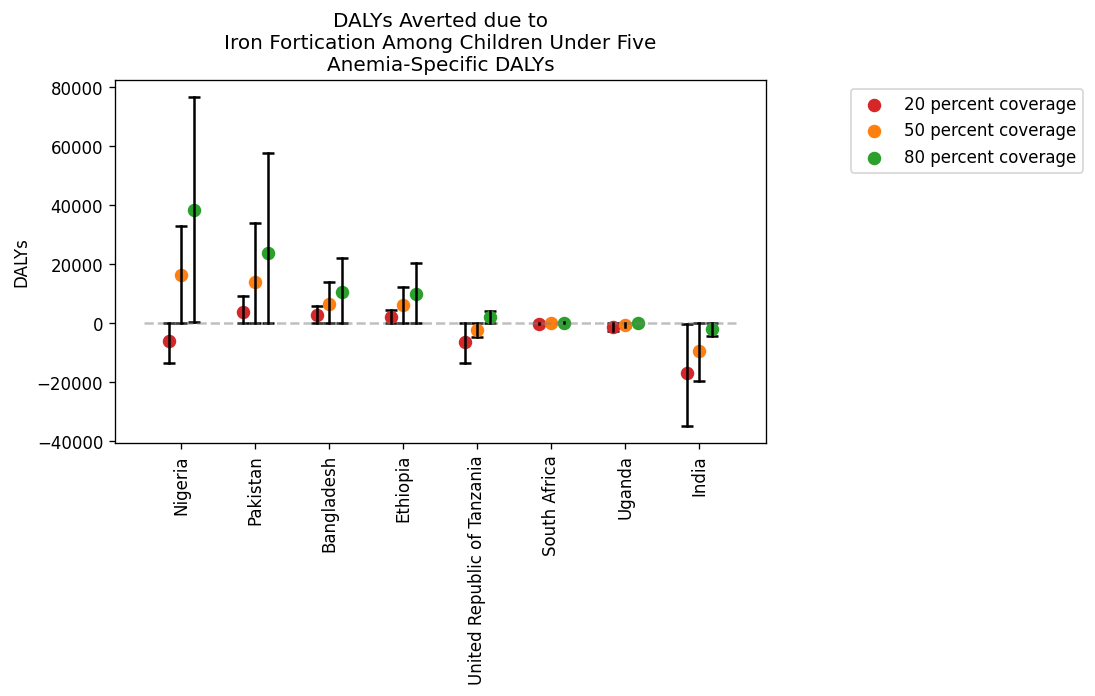

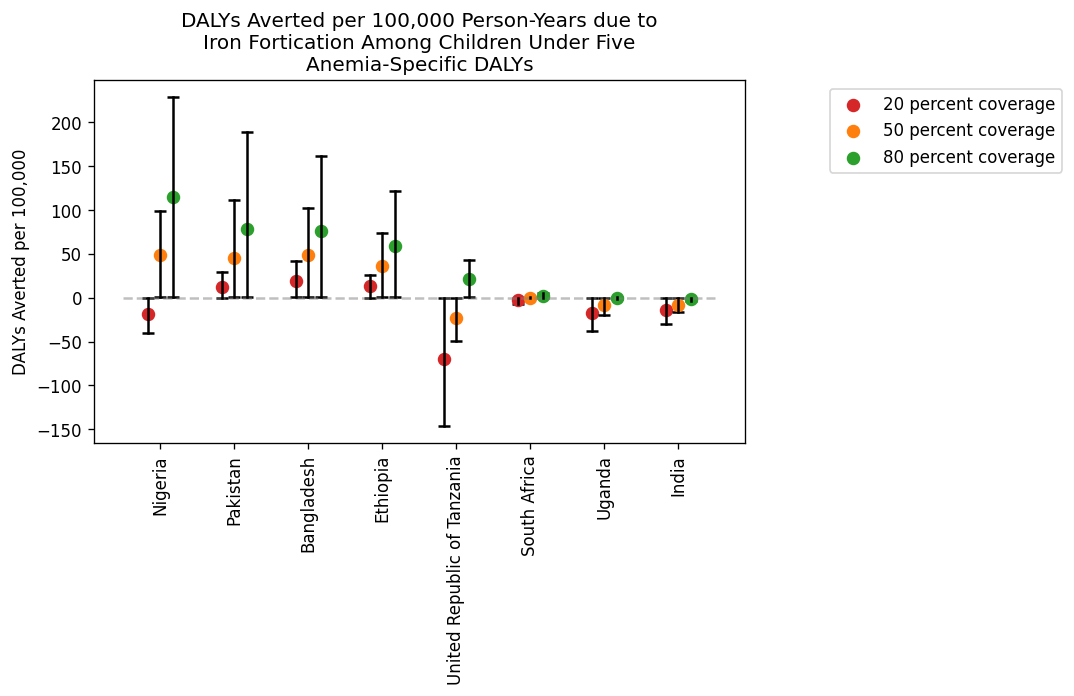

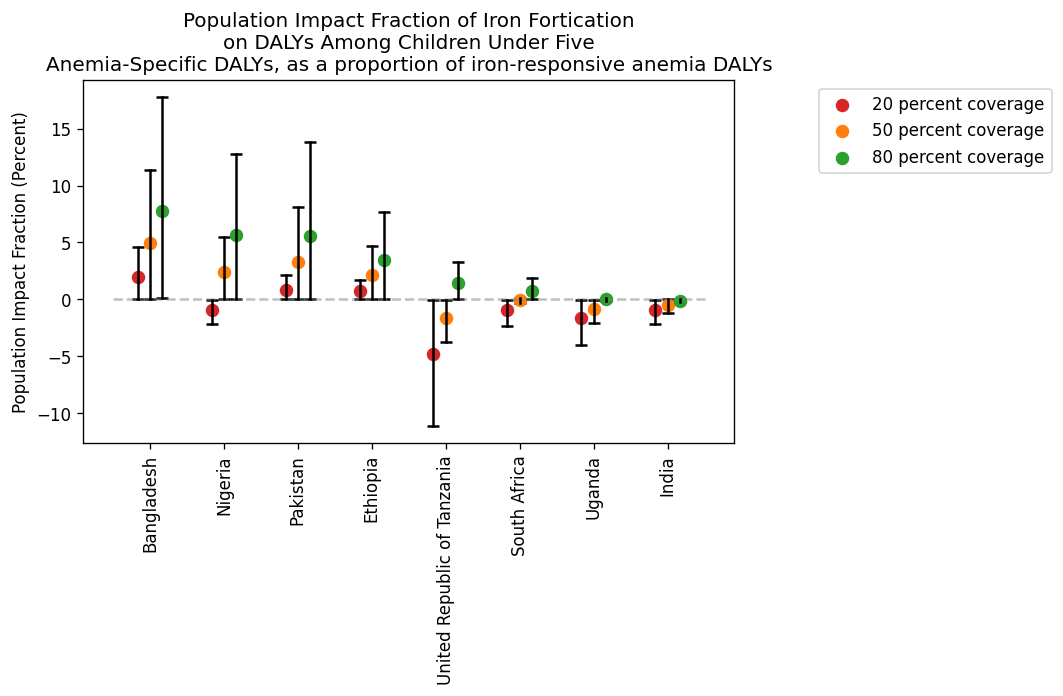

In [59]:
make_dot_plots(
    anemia_counts_averted, 
    'Iron', 
    'counts', 
    coverage_levels, 'Anemia-Specific DALYs',
    'iron_u5_anemia_counts_averted')

make_dot_plots(
    anemia_rates_averted, 
    'Iron', 
    'rates', 
    coverage_levels, 'Anemia-Specific DALYs',
    'iron_u5_anemia_rates_averted')

make_dot_plots(
    anemia_pifs, 
    'Iron', 
    'pifs', 
    coverage_levels, 'Anemia-Specific DALYs, as a proportion of iron-responsive anemia DALYs',
    'iron_u5_anemia_pif')

# LBWSG to be added ....

In [55]:
pct_change = (baseline_anemia[['anemic']] - counterfactual_anemia[['anemic']]) / baseline_anemia[['anemic']]
pct_change = (pct_change.reset_index()
              .rename(columns={'anemic':'value'}))
pct_change['coverage_level'] = pct_change['coverage_level'].astype(float)
pct_change = (pct_change
              .set_index(['location_id','sex_id','age_group_id','year','coverage_level','draw'])
              .sort_index())
delta = (delta_effective_coverage
         .stack()
         .reset_index()
         .rename(columns={'level_5':'draw',0:'value'})
         .set_index(['location_id','sex_id','age_group_id','year','coverage_level','draw'])
         .sort_index())
pct_change = pct_change / delta * 100
pct_change

value
location_id sex_id age_group_id year coverage_level draw               
161         1      2            2021 0.2            draw_0          NaN
                                                    draw_1          NaN
                                                    draw_10         NaN
                                                    draw_100        NaN
                                                    draw_101        NaN
...                                                                 ...
214         2      5            2025 0.8            draw_995  10.535324
                                                    draw_996  15.538665
                                                    draw_997   8.815881
                                                    draw_998   8.195671
                                                    draw_999   7.646789

[960000 rows x 1 columns]

In [62]:
pct = pct_change.reset_index()
pct = (pct.loc[pct.year==2025].loc[pct.age_group_id==5])
pct = pct.groupby(['location_id','age_group_id','year','coverage_level']).mean() # average across sexes here
avg_loc = pct.groupby('coverage_level').mean()
avg_loc

,sex_id,value
coverage_level,,
0.2,1.5,17.791453
0.5,1.5,17.754801
0.8,1.5,17.714465
